In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from src.model.dcgan.spectral_norm import spectral_norm as SN

class Discriminator_SN(nn.Module):
    def __init__(self, activasion_slope: float = 0.2) -> None:
        super().__init__()
        self.convolutions = nn.Sequential(
            SN(nn.Conv2d(in_channels=3, out_channels=128, kernel_size=5, stride=2, padding=2)),
            nn.LeakyReLU(negative_slope=activasion_slope),
            SN(nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, stride=2, padding=2)),
            nn.BatchNorm2d(num_features=256),
            nn.LeakyReLU(negative_slope=activasion_slope),
            SN(nn.Conv2d(in_channels=256, out_channels=512, kernel_size=5, stride=2, padding=2)),
            nn.BatchNorm2d(num_features=512),
            nn.LeakyReLU(negative_slope=activasion_slope),
            SN(nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=5, stride=2, padding=2)),
            nn.BatchNorm2d(num_features=1024),
            nn.LeakyReLU(negative_slope=activasion_slope)
        )
        self.clf = nn.Linear(in_features=1024 * 4 * 4, out_features=1)

    def forward(self, x):
        x = self.convolutions(x)
        x = torch.flatten(x, start_dim=1)
        x = self.clf(x)
        x = F.sigmoid(x)
        return x

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class Discriminator(nn.Module):
    def __init__(self, activasion_slope: float = 0.2) -> None:
        super().__init__()
        self.convolutions = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(negative_slope=activasion_slope),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(num_features=256),
            nn.LeakyReLU(negative_slope=activasion_slope),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(num_features=512),
            nn.LeakyReLU(negative_slope=activasion_slope),
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(num_features=1024),
            nn.LeakyReLU(negative_slope=activasion_slope)
        )
        self.clf = nn.Linear(in_features=1024 * 4 * 4, out_features=1)

    def forward(self, x):
        x = self.convolutions(x)
        x = torch.flatten(x, start_dim=1)
        x = self.clf(x)
        x = F.sigmoid(x)
        return x

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self, latent_dim: int):
        super(Generator, self).__init__()
        self.proj = nn.Linear(latent_dim, 1024 * 4 * 4)
        self.batch_norm = nn.BatchNorm2d(num_features=1024)
        self.activasion = nn.ReLU()
        self.upsampling = nn.Sequential(
            nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=128, out_channels=3, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        batch_size = x.size()[0]
        x = self.proj(x)
        x = x.view(batch_size, 1024, 4, 4)
        x = self.batch_norm(x)
        x = self.activasion(x)
        x = self.upsampling(x)
        return x

In [ ]:
import torch
from torch import nn

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
!pip install piq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
! wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.utils as vutils
from torch.utils.data import DataLoader, TensorDataset

from piq import ssim, SSIMLoss, FID

import wandb

from tqdm import tqdm

def collate_fn(data):
    images, labels = zip(*data)
    images = torch.stack(images, dim=0).float()
    labels = torch.tensor(labels).int()
    return {'images': images, 'labels': labels}

class Trainer:
    def __init__(
            self,
            run_name: str,
            model_generator, model_discriminator,
            optimizer_generator, optimizer_discriminator,
            criterion,
            train_loader, test_loader,
            lr_scheduler_generator = None, lr_scheduler_discriminator = None,
            device = None, start_epoch: int = 1, len_epoch: int = None) -> None:

        self.model_g = model_generator
        self.model_d = model_discriminator
        self.optimizer_g = optimizer_generator
        self.optimizer_d = optimizer_discriminator
        self.lr_scheduler_g = lr_scheduler_generator
        self.lr_scheduler_d = lr_scheduler_discriminator
        self.criterion = criterion

        self.start_epoch = start_epoch
        self.train_loader = train_loader
        self.test_loader = test_loader

        if len_epoch is None:
            len_epoch = len(train_loader)

        self.len_epoch = len_epoch
        self.device = device
        self.epoch = start_epoch

        if wandb.run is not None:
            wandb.finish()

        wandb.init(
            project='dcgan',
            name=run_name
        )

        self.step = 0

    @torch.no_grad()
    def get_grad_norm(self, model, norm_type=2):
        parameters = model.parameters()
        if isinstance(parameters, torch.Tensor):
            parameters = [parameters]
        parameters = [p for p in parameters if p.grad is not None]
        total_norm = torch.norm(
            torch.stack(
                [torch.norm(p.grad.detach(), norm_type).cpu() for p in parameters]
            ),
            norm_type,
        )
        return total_norm.item()

    def _train_epoch(self):
        self.model_g.train()
        self.model_d.train()

        for batch in tqdm(self.train_loader, total=self.len_epoch, desc=f'Epoch: {self.epoch}'):
            real_image = batch['images'].to(self.device)
            batch_size = real_image.size()[0]
            real_label = torch.ones((batch_size, 1), dtype=torch.float).to(self.device)
            fake_label = torch.zeros((batch_size, 1), dtype=torch.float).to(self.device)

            # Update discriminator first
            self.optimizer_d.zero_grad()
            logit_real = self.model_d(real_image)
            d_loss_real = self.criterion(logit_real, real_label)
            d_loss_real.backward()

            fake_image = torch.randn(size=(batch_size, 100)).to(self.device)
            fake_image = self.model_g(fake_image)
            logit_fake = self.model_d(fake_image.detach())
            d_loss_fake = self.criterion(logit_fake, fake_label)
            d_loss_fake.backward()
            d_loss = d_loss_real.item() + d_loss_fake.item()
            self.optimizer_d.step()

            # Update generator now
            self.optimizer_g.zero_grad()
            logit_fake = self.model_d(fake_image)
            g_loss = self.criterion(logit_fake, real_label)
            g_loss.backward()
            self.optimizer_g.step()

            g_loss = g_loss.item()

            wandb.log({
                'g_loss': g_loss, 'd_loss': d_loss,
                'g_norm': self.get_grad_norm(self.model_g), 'd_norm': self.get_grad_norm(self.model_d)
            }, step=self.step)
            self.step += 1




    @torch.no_grad()
    def _generate_examples(self):
        self.model_g.eval()
        fake_image = torch.randn(size=(128, 100)).to(self.device)
        fake_image = self.model_g(fake_image)

        grid = vutils.make_grid(fake_image, nrow=8, padding=2, normalize=True)
        wandb.log({'generated_images': wandb.Image(grid)}, step=self.step)

    @torch.no_grad()
    def _eval_epoch(self):
        self.model_g.eval()
        generated_dataset = []
        real_dataset = []
        ssim_index = 0
        for batch in self.test_loader:
            real_image = batch['images'].to(self.device)
            batch_size = real_image.size()[0]
            fake_image = torch.randn(size=(batch_size, 100)).to(self.device)
            fake_image = self.model_g(fake_image)

            fake_image = fake_image * 0.5 + 0.5
            real_image = real_image * 0.5 + 0.5
            generated_dataset.append(fake_image)
            real_dataset.append(real_image)
            ssim_index += ssim(fake_image, real_image, data_range=1.).item() * batch_size
        ssim_index /= len(self.test_loader.dataset)

        generated_dataset = torch.cat(generated_dataset, dim=0)
        real_dataset = torch.cat(real_dataset, dim=0)
        generated_dataset = DataLoader(
            TensorDataset(generated_dataset, torch.zeros(generated_dataset.size()[0], )),
            batch_size=batch_size, collate_fn=collate_fn
        )
        real_dataset = DataLoader(
            TensorDataset(real_dataset, torch.zeros(real_dataset.size()[0], )),
            batch_size=batch_size, collate_fn=collate_fn
        )

        fid_metric = FID()
        first_feats = fid_metric.compute_feats(real_dataset)
        second_feats = fid_metric.compute_feats(generated_dataset)
        fid = fid_metric(first_feats, second_feats).item()

        wandb.log({'FID': fid, 'SSIM': ssim_index}, step=self.step)

    # @torch.no_grad()
    # def display_interpolated_images(self, steps=8):
    #     # Randomly select two images from the dataset
    #     indices = torch.randperm(len(self.train_loader.dataset))[:2]
    #     images = [self.train_loader.dataset[i][0].to(self.device) for i in indices]  # Ensure images are on the same device as the model

    #     # Generate latent vectors for the two selected images
    #     z1 = torch.randn(1, 100).to(self.device)
    #     z2 = torch.randn(1, 100).to(self.device)

    #     # Generate images from the latent vectors
    #     image1 = self.model_g(z1)
    #     image2 = self.model_g(z2)

    #     # Interpolated images will also be on the same device
    #     interpolated_images = [image1, image2]

    #     # Perform interpolation
    #     for alpha in np.linspace(0, 1, steps + 2)[1:-1]:  # Exclude the first and last values to avoid duplication
    #         z = z1 * alpha + z2 * (1 - alpha)
    #         interpolated_image = self.model_g(z)
    #         interpolated_images.append(interpolated_image)

    #     # Combine the chosen and interpolated images into one tensor
    #     all_images = images + interpolated_images

    #     # Before concatenation, make sure all images are on the same device
    #     all_images = [img.to(self.device) for img in all_images]
    #     image_grid = torch.cat(all_images, 0)

    #     # Make the grid for display
    #     grid = vutils.make_grid(image_grid, nrow=10, padding=2, normalize=True)

    #     # Log the grid to wandb
    #     wandb.log({'interpolated_images_with_chosen': wandb.Image(grid)}, step=self.step)

    #     # If you're going to save the images, move the grid to the CPU first
    #     return grid.cpu()  # Move to CPU for saving

    # Save the state dictionaries of the models and the optimizers

    @torch.no_grad()
    def interpolate_and_generate(self, steps=8):
        # Choose two random indices for interpolation
        idx1, idx2 = np.random.choice(len(self.test_loader.dataset), 2, replace=False)

        # Get the images for the selected indices
        img1, img2 = self.test_loader.dataset[idx1][0].unsqueeze(0).to(self.device), \
                    self.test_loader.dataset[idx2][0].unsqueeze(0).to(self.device)

        # Generate random latent vectors from the normal distribution
        z1, z2 = torch.randn((1, 100)).to(self.device), torch.randn((1, 100)).to(self.device)

        interpolated_images = [img1]

        # Interpolate between the two latent vectors
        for alpha in np.linspace(0, 1, steps+2)[1:-1]:  # Exclude the endpoints to only get intermediate steps
            interpolated_z = z1 * (1 - alpha) + z2 * alpha
            interpolated_img = self.model_g(interpolated_z)
            interpolated_images.append(interpolated_img)

        interpolated_images.append(img2)

        # Convert list of tensors to tensor
        interpolated_images = torch.cat(interpolated_images, 0)

        # Make a grid and save the image
        grid = vutils.make_grid(interpolated_images, nrow=steps+2, padding=2, normalize=True)
        interpolated_image_path = drive_path+f"interpolated_images_epoch_{self.epoch}.png"
        vutils.save_image(grid, interpolated_image_path)

        return grid, interpolated_image_path

    # Save the state dictionaries of the models and the optimizers
    @torch.no_grad()
    def _save_checkpoint(self, filename="trained_model_checkpoint_without.pth.tar"):
        state = {
            'epoch': self.epoch,
            'state_dict_generator': self.model_g.state_dict(),
            'state_dict_discriminator': self.model_d.state_dict(),
            'optimizer_g': self.optimizer_g.state_dict(),
            'optimizer_d': self.optimizer_d.state_dict(),
        }
        if self.lr_scheduler_g is not None:
            state['scheduler_g'] = self.lr_scheduler_g.state_dict()
        if self.lr_scheduler_d is not None:
            state['scheduler_d'] = self.lr_scheduler_d.state_dict()

        torch.save(state, filename)

    def train(self, n_epoch: int):
        for epoch in range(self.start_epoch, n_epoch + 1):
            self.epoch = epoch
            self._train_epoch()
            self._generate_examples()
            self._eval_epoch()
            if epoch % 10 == 0:
              self._save_checkpoint(drive_path+'trained_model_checkpoint_without.pth.tar')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/gan-main/"

Mounted at /content/drive


In [ ]:
import torch
from torch import nn

from torchvision.datasets import GTSRB
import torchvision.transforms as T
from torch.utils.data import DataLoader
import os


def collate_fn(data):
    images, labels = zip(*data)
    images = torch.stack(images, dim=0).float()
    labels = torch.tensor(labels).int()
    return {'images': images, 'labels': labels}

# Убедимся, что код запускается только при выполнении в качестве основной программы
if __name__ == '__main__':
    os.environ['WANDB_API_KEY'] = 'Your wandb api key'

    # Определим преобразования для загрузки данных
    transform = T.Compose([
        T.Resize(64),
        T.CenterCrop(64),
        T.ToTensor(),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


    # Создадим загрузчик данных
    train_data = GTSRB(root=drive_path+"data/", split='train', download=True, transform=transform)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True, num_workers=4, collate_fn=collate_fn)

    test_data = GTSRB(root=drive_path+"data/", split='test', download=True, transform=transform)
    test_loader = DataLoader(test_data, batch_size=64, shuffle=True, drop_last=True, num_workers=4, collate_fn=collate_fn)

    # Определим устройство для обучения
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(DEVICE)
    # Инициализируем генератор и дискриминатор
    model_g = Generator(latent_dim=100).to(DEVICE)
    model_d = Discriminator().to(DEVICE)

    # Определим функцию потерь и оптимизаторы
    criterion = nn.BCELoss()
    optimizer_d = torch.optim.Adam(model_d.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_g = torch.optim.Adam(model_g.parameters(), lr=0.0002, betas=(0.5, 0.999))

    # Инициализируем тренера
    t = Trainer(
        run_name='training',
        model_discriminator=model_d,
        model_generator=model_g,
        optimizer_generator=optimizer_g,
        optimizer_discriminator=optimizer_d,
        criterion=criterion,
        train_loader=train_loader,
        test_loader=test_loader,
        device=DEVICE
    )

    # Запускаем обучение на 100 эпох
    t.train(n_epoch=200)


100%|██████████| 187490228/187490228 [00:11<00:00, 16000517.73it/s]


Extracting /content/drive/MyDrive/gan-main/data/gtsrb/GTSRB-Training_fixed.zip to /content/drive/MyDrive/gan-main/data/gtsrb


100%|██████████| 88978620/88978620 [00:06<00:00, 14680661.60it/s]


Extracting /content/drive/MyDrive/gan-main/data/gtsrb/GTSRB_Final_Test_Images.zip to /content/drive/MyDrive/gan-main/data/gtsrb


100%|██████████| 99620/99620 [00:00<00:00, 209435.59it/s]


Extracting /content/drive/MyDrive/gan-main/data/gtsrb/GTSRB_Final_Test_GT.zip to /content/drive/MyDrive/gan-main/data/gtsrb
cuda


wandb: Currently logged in as: bromotdi (bromotd). Use `wandb login --relogin` to force relogin


Epoch: 1:   0%|          | 0/416 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch: 1: 100%|██████████| 416/416 [00:45<00:00,  9.16it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hu

Epoch: 2: 100%|██████████| 416/416 [00:43<00:00,  9.61it/s]


Epoch: 3: 100%|██████████| 416/416 [00:44<00:00,  9.38it/s]


Epoch: 4: 100%|██████████| 416/416 [00:44<00:00,  9.25it/s]


Epoch: 5: 100%|██████████| 416/416 [00:44<00:00,  9.34it/s]


Epoch: 6: 100%|██████████| 416/416 [00:44<00:00,  9.42it/s]


Epoch: 7: 100%|██████████| 416/416 [00:44<00:00,  9.43it/s]


Epoch: 8: 100%|██████████| 416/416 [00:44<00:00,  9.41it/s]


Epoch: 9: 100%|██████████| 416/416 [00:44<00:00,  9.32it/s]


Epoch: 10: 100%|██████████| 416/416 [00:44<00:00,  9.31it/s]


Epoch: 11: 100%|██████████| 416/416 [00:45<00:00,  9.23it/s]


Epoch: 12: 100%|██████████| 416/416 [00:44<00:00,  9.40it/s]


Epoch: 13: 100%|██████████| 416/416 [00:44<00:00,  9.25it/s]


Epoch: 14: 100%|██████████| 416/416 [00:44<00:00,  9.30it/s]


Epoch: 15: 100%|██████████| 416/416 [00:44<00:00,  9.35it/s]


Epoch: 16: 100%|██████████| 416/416 [00:44<00:00,  9.27it/s]


Epoch: 17: 100%|██████████| 416/416 [00:44<00:00,  9.26it/s]


Epoch: 18: 100%|██████████| 416/416 [00:45<00:00,  9.24it/s]


Epoch: 19: 100%|██████████| 416/416 [00:44<00:00,  9.37it/s]


Epoch: 20: 100%|██████████| 416/416 [00:44<00:00,  9.34it/s]


Epoch: 21: 100%|██████████| 416/416 [00:46<00:00,  9.01it/s]


Epoch: 22: 100%|██████████| 416/416 [00:44<00:00,  9.36it/s]


Epoch: 23: 100%|██████████| 416/416 [00:44<00:00,  9.36it/s]


Epoch: 24: 100%|██████████| 416/416 [00:44<00:00,  9.34it/s]


Epoch: 25: 100%|██████████| 416/416 [00:44<00:00,  9.31it/s]


Epoch: 26: 100%|██████████| 416/416 [00:44<00:00,  9.27it/s]


Epoch: 27: 100%|██████████| 416/416 [00:44<00:00,  9.42it/s]


Epoch: 28: 100%|██████████| 416/416 [00:44<00:00,  9.35it/s]


Epoch: 29: 100%|██████████| 416/416 [00:45<00:00,  9.19it/s]


Epoch: 30: 100%|██████████| 416/416 [00:45<00:00,  9.21it/s]


Epoch: 31: 100%|██████████| 416/416 [00:45<00:00,  9.16it/s]


Epoch: 32: 100%|██████████| 416/416 [00:45<00:00,  9.21it/s]


Epoch: 33: 100%|██████████| 416/416 [00:44<00:00,  9.38it/s]


Epoch: 34: 100%|██████████| 416/416 [00:43<00:00,  9.47it/s]


Epoch: 35: 100%|██████████| 416/416 [00:44<00:00,  9.36it/s]


Epoch: 36: 100%|██████████| 416/416 [00:44<00:00,  9.31it/s]


Epoch: 37: 100%|██████████| 416/416 [00:44<00:00,  9.43it/s]


Epoch: 38: 100%|██████████| 416/416 [00:44<00:00,  9.28it/s]


Epoch: 39: 100%|██████████| 416/416 [00:44<00:00,  9.28it/s]


Epoch: 40: 100%|██████████| 416/416 [00:44<00:00,  9.42it/s]


Epoch: 41: 100%|██████████| 416/416 [00:44<00:00,  9.29it/s]


Epoch: 42: 100%|██████████| 416/416 [00:44<00:00,  9.40it/s]


Epoch: 43: 100%|██████████| 416/416 [00:43<00:00,  9.46it/s]


Epoch: 44: 100%|██████████| 416/416 [00:43<00:00,  9.54it/s]


Epoch: 45: 100%|██████████| 416/416 [00:44<00:00,  9.33it/s]


Epoch: 46: 100%|██████████| 416/416 [00:43<00:00,  9.47it/s]


Epoch: 47: 100%|██████████| 416/416 [00:44<00:00,  9.40it/s]


Epoch: 48: 100%|██████████| 416/416 [00:43<00:00,  9.58it/s]


Epoch: 49: 100%|██████████| 416/416 [00:43<00:00,  9.54it/s]


Epoch: 50: 100%|██████████| 416/416 [00:44<00:00,  9.34it/s]


Epoch: 51: 100%|██████████| 416/416 [00:45<00:00,  9.21it/s]


Epoch: 52: 100%|██████████| 416/416 [00:43<00:00,  9.48it/s]


Epoch: 53: 100%|██████████| 416/416 [00:44<00:00,  9.41it/s]


Epoch: 54: 100%|██████████| 416/416 [00:43<00:00,  9.57it/s]


Epoch: 55: 100%|██████████| 416/416 [00:43<00:00,  9.48it/s]


Epoch: 56: 100%|██████████| 416/416 [00:44<00:00,  9.44it/s]


Epoch: 57: 100%|██████████| 416/416 [00:43<00:00,  9.47it/s]


Epoch: 58: 100%|██████████| 416/416 [00:44<00:00,  9.44it/s]


Epoch: 59: 100%|██████████| 416/416 [00:44<00:00,  9.44it/s]


Epoch: 60: 100%|██████████| 416/416 [00:43<00:00,  9.47it/s]


Epoch: 61: 100%|██████████| 416/416 [00:45<00:00,  9.10it/s]


Epoch: 62: 100%|██████████| 416/416 [00:43<00:00,  9.57it/s]


Epoch: 63: 100%|██████████| 416/416 [00:43<00:00,  9.49it/s]


Epoch: 64: 100%|██████████| 416/416 [00:44<00:00,  9.39it/s]


Epoch: 65: 100%|██████████| 416/416 [00:44<00:00,  9.40it/s]


Epoch: 66: 100%|██████████| 416/416 [00:43<00:00,  9.46it/s]


Epoch: 67: 100%|██████████| 416/416 [00:44<00:00,  9.43it/s]


Epoch: 68: 100%|██████████| 416/416 [00:43<00:00,  9.54it/s]


Epoch: 69: 100%|██████████| 416/416 [00:43<00:00,  9.61it/s]


Epoch: 70: 100%|██████████| 416/416 [00:43<00:00,  9.62it/s]


Epoch: 71: 100%|██████████| 416/416 [00:45<00:00,  9.21it/s]


Epoch: 72: 100%|██████████| 416/416 [00:43<00:00,  9.56it/s]


Epoch: 73: 100%|██████████| 416/416 [00:43<00:00,  9.57it/s]


Epoch: 74: 100%|██████████| 416/416 [00:43<00:00,  9.55it/s]


Epoch: 75: 100%|██████████| 416/416 [00:43<00:00,  9.58it/s]


Epoch: 76: 100%|██████████| 416/416 [00:43<00:00,  9.58it/s]


Epoch: 77: 100%|██████████| 416/416 [00:44<00:00,  9.42it/s]


Epoch: 78: 100%|██████████| 416/416 [00:43<00:00,  9.58it/s]


Epoch: 79: 100%|██████████| 416/416 [00:43<00:00,  9.49it/s]


Epoch: 80: 100%|██████████| 416/416 [00:43<00:00,  9.54it/s]


Epoch: 81: 100%|██████████| 416/416 [00:44<00:00,  9.31it/s]


Epoch: 82: 100%|██████████| 416/416 [00:43<00:00,  9.58it/s]


Epoch: 83: 100%|██████████| 416/416 [00:43<00:00,  9.53it/s]


Epoch: 84: 100%|██████████| 416/416 [00:43<00:00,  9.58it/s]


Epoch: 85: 100%|██████████| 416/416 [00:43<00:00,  9.55it/s]


Epoch: 86: 100%|██████████| 416/416 [00:43<00:00,  9.48it/s]


Epoch: 87: 100%|██████████| 416/416 [00:44<00:00,  9.40it/s]


Epoch: 88: 100%|██████████| 416/416 [00:44<00:00,  9.38it/s]


Epoch: 89: 100%|██████████| 416/416 [00:43<00:00,  9.50it/s]


Epoch: 90: 100%|██████████| 416/416 [00:43<00:00,  9.51it/s]


Epoch: 91: 100%|██████████| 416/416 [00:45<00:00,  9.11it/s]


Epoch: 92: 100%|██████████| 416/416 [00:43<00:00,  9.51it/s]


Epoch: 93: 100%|██████████| 416/416 [00:44<00:00,  9.45it/s]


Epoch: 94: 100%|██████████| 416/416 [00:44<00:00,  9.45it/s]


Epoch: 95: 100%|██████████| 416/416 [00:43<00:00,  9.51it/s]


Epoch: 96: 100%|██████████| 416/416 [00:44<00:00,  9.38it/s]


Epoch: 97: 100%|██████████| 416/416 [00:43<00:00,  9.53it/s]


Epoch: 98: 100%|██████████| 416/416 [00:43<00:00,  9.47it/s]


Epoch: 99: 100%|██████████| 416/416 [00:43<00:00,  9.60it/s]


Epoch: 100: 100%|██████████| 416/416 [00:43<00:00,  9.50it/s]


In [ ]:
# Save the state dictionaries of the models and the optimizers
def save_checkpoint(trainer, filename="trained_model_checkpoint_without.pth.tar"):
    state = {
        'epoch': trainer.epoch,
        'state_dict_generator': trainer.model_g.state_dict(),
        'state_dict_discriminator': trainer.model_d.state_dict(),
        'optimizer_g': trainer.optimizer_g.state_dict(),
        'optimizer_d': trainer.optimizer_d.state_dict(),
    }
    if trainer.lr_scheduler_g is not None:
        state['scheduler_g'] = trainer.lr_scheduler_g.state_dict()
    if trainer.lr_scheduler_d is not None:
        state['scheduler_d'] = trainer.lr_scheduler_d.state_dict()

    torch.save(state, filename)

# Example usage:
save_checkpoint(t, drive_path+'trained_model_checkpoint_without.pth.tar')


In [ ]:
def load_checkpoint(filename="trained_model_checkpoint_without.pth.tar"):
    state = torch.load(filename, map_location=DEVICE)

    # Create new instances of models and optimizers
    model_g = Generator(latent_dim=100).to(DEVICE)
    model_d = Discriminator().to(DEVICE)
    optimizer_g = torch.optim.Adam(model_g.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_d = torch.optim.Adam(model_d.parameters(), lr=0.0002, betas=(0.5, 0.999))

    # Load the saved state dictionaries
    model_g.load_state_dict(state['state_dict_generator'])
    model_d.load_state_dict(state['state_dict_discriminator'])
    optimizer_g.load_state_dict(state['optimizer_g'])
    optimizer_d.load_state_dict(state['optimizer_d'])

    # Create a new Trainer instance
    t = Trainer(
        run_name='resumed_run',
        model_generator=model_g,
        model_discriminator=model_d,
        optimizer_generator=optimizer_g,
        optimizer_discriminator=optimizer_d,
        criterion=nn.BCELoss(),
        train_loader=train_loader,  # Assuming these are available in your scope
        test_loader=test_loader,    # Assuming these are available in your scope
        device=DEVICE,
        start_epoch=state['epoch']
    )

    # If you saved scheduler states, load them as well
    if 'scheduler_g' in state:
        # Assume lr_scheduler_g is initialized here as per your training setup
        t.lr_scheduler_g.load_state_dict(state['scheduler_g'])
    if 'scheduler_d' in state:
        # Assume lr_scheduler_d is initialized here as per your training setup
        t.lr_scheduler_d.load_state_dict(state['scheduler_d'])

    return t

# Example usage:
t = load_checkpoint(drive_path+"trained_model_checkpoint_without.pth.tar")


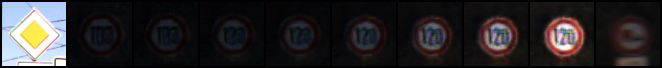

In [ ]:
# Assuming you've already defined the Generator class and DEVICE is set
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np
# After training is complete
interpolated_grid, image_path = t.interpolate_and_generate(steps=8)
# Show the interpolated image grid
from IPython.display import Image
Image(image_path)
